<a href="https://colab.research.google.com/github/elangptra/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum 10**

Nama: Elang Putra Adam

Kelas: TI-3G

NIM: 2141720074

# **Praktikum**

1.	Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

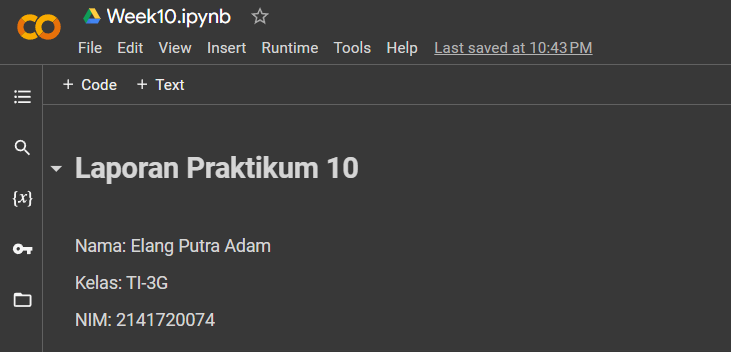

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.	Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [3]:
!pip install pytesseract

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3.	Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

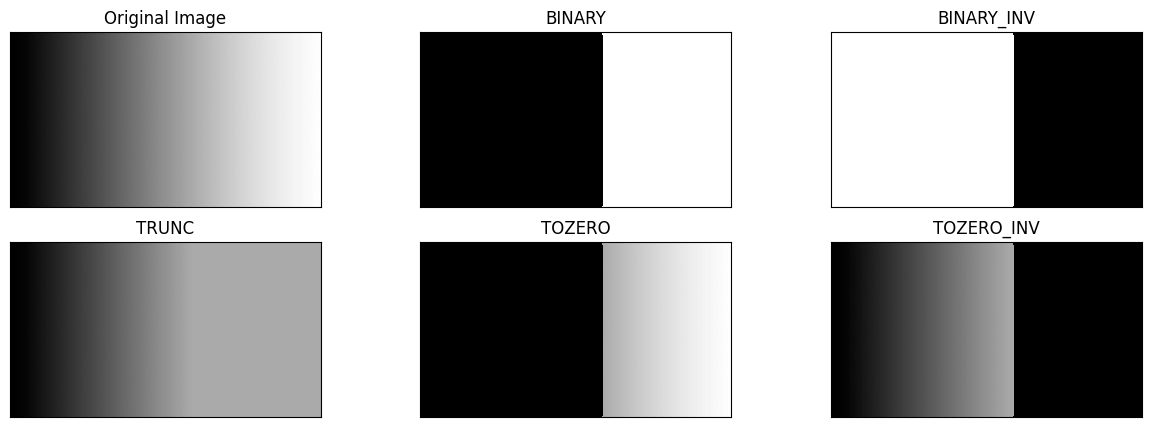

In [16]:
import cv2 as cv

filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

4.	Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

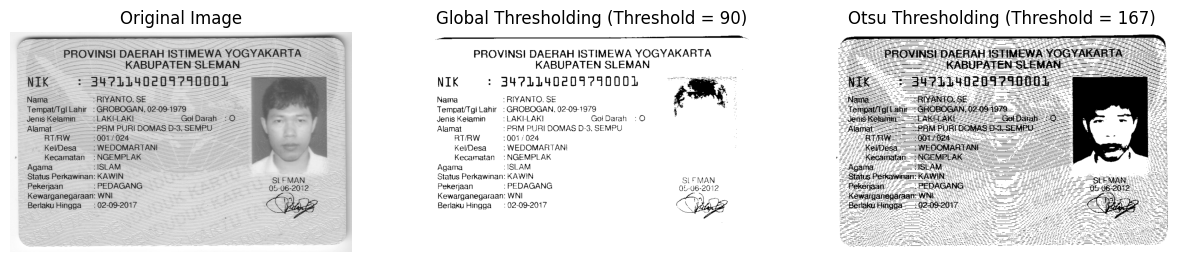

In [19]:
def otsu_thresholding(image):
    # Menghitung histogram gambar
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    hist_norm = hist.ravel() / hist.max()

    Q = hist_norm.cumsum()

    bins = np.arange(256)

    fn_min = np.inf
    thresh = -1

    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])
        q1, q2 = Q[i], Q[255] - Q[i]
        if q1 == 0 or q2 == 0:
            continue

        b1, b2 = np.hsplit(bins, [i])

        # Menghitung varian di setiap threshold
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

        # Menghitung fungsi objektif untuk Otsu
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i

    return thresh

def global_thresholding(image, threshold):
    ret, global_thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return global_thresh

# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png'  # Ganti dengan path gambar Anda
img = cv2.imread(image_path, 0)  # Membaca gambar dalam skala keabuan

# Menentukan nilai threshold untuk global thresholding
global_thresh_value = 90  # Ubah nilai threshold sesuai kebutuhan

# Menggunakan Otsu's Thresholding
otsu_threshold = otsu_thresholding(img)
ret, otsu = cv2.threshold(img, otsu_threshold, 255, cv2.THRESH_BINARY)

# Melakukan Global Thresholding
global_img = global_thresholding(img, global_thresh_value)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_img, cmap='gray')
plt.title('Global Thresholding (Threshold = ' + str(global_thresh_value) + ')')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu, cmap='gray')
plt.title('Otsu Thresholding (Threshold = ' + str(otsu_threshold) + ')')
plt.axis('off')

plt.show()

5.	Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk:

  a.	anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b.	Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html  
  
  c.	Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).


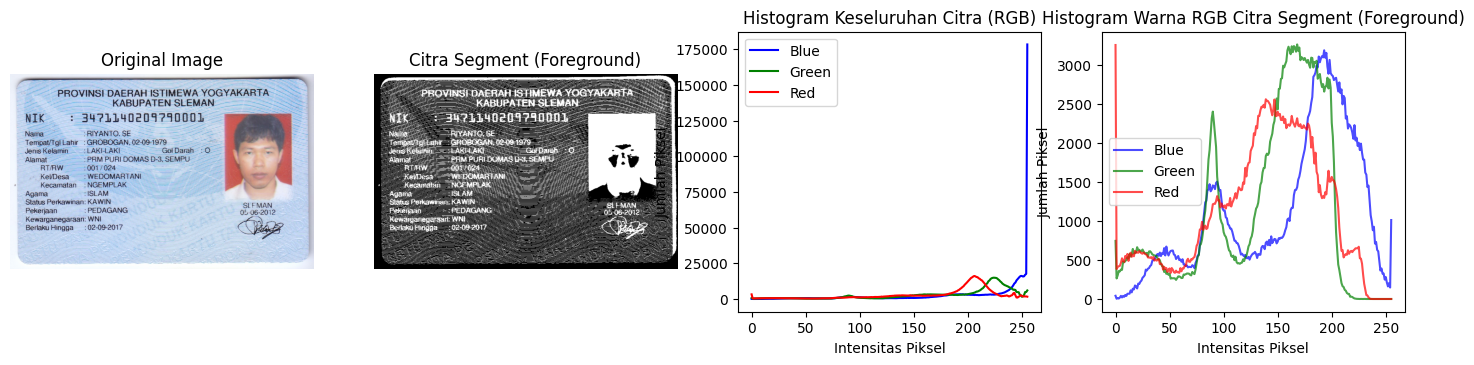

In [20]:
# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png'  # Ganti dengan path gambar Anda
img = cv2.imread(image_path)

# Konversi ke citra keabuan
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Lakukan segmentasi (contoh: global thresholding)
ret, thresholded = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
foreground = cv2.bitwise_not(thresholded)

# Pisahkan saluran warna (BGR)
b, g, r = cv2.split(img)

# Hitung histogram untuk setiap saluran warna pada citra keseluruhan
hist_full_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_full_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_full_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Hitung histogram untuk setiap saluran warna pada citra segmentasi
hist_segmented_b = cv2.calcHist([b], [0], foreground, [256], [0, 256])
hist_segmented_g = cv2.calcHist([g], [0], foreground, [256], [0, 256])
hist_segmented_r = cv2.calcHist([r], [0], foreground, [256], [0, 256])

plt.figure(figsize=(18, 8))

# Tampilkan gambar asli
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Tampilkan citra segment (foreground)
plt.subplot(2, 4, 2)
plt.imshow(foreground, cmap='gray')
plt.title('Citra Segment (Foreground)')
plt.axis('off')

# Tampilkan histogram untuk keseluruhan citra (RGB)
plt.subplot(2, 4, 3)
plt.plot(hist_full_b, color='blue', label='Blue')
plt.plot(hist_full_g, color='green', label='Green')
plt.plot(hist_full_r, color='red', label='Red')
plt.title('Histogram Keseluruhan Citra (RGB)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Tampilkan histogram warna RGB pada citra segment (foreground)
plt.subplot(2, 4, 4)
plt.plot(hist_segmented_b, color='blue', label='Blue', alpha=0.7)
plt.plot(hist_segmented_g, color='green', label='Green', alpha=0.7)
plt.plot(hist_segmented_r, color='red', label='Red', alpha=0.7)
plt.title('Histogram Warna RGB Citra Segment (Foreground)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.show()

6.	Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

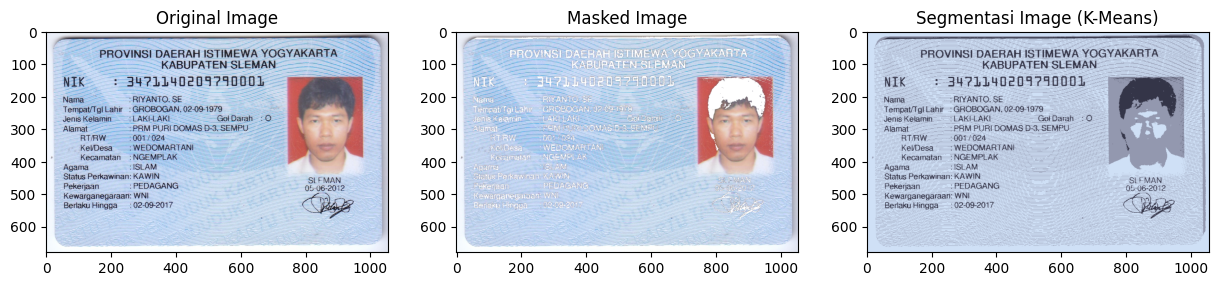

In [24]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 1
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(1, 3, 3), plt.imshow(segmented_image)
plt.title('Segmentasi Image (K-Means)')

plt.show()

# **Proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan**

1.	Install PIP OCR

In [25]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 6 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 12s (437 kB/s)
debconf: unable to initi

2.	Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

In [26]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

3.	Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [30]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4.	Menambahkan kotak untuk deteksi teksi pada gambar

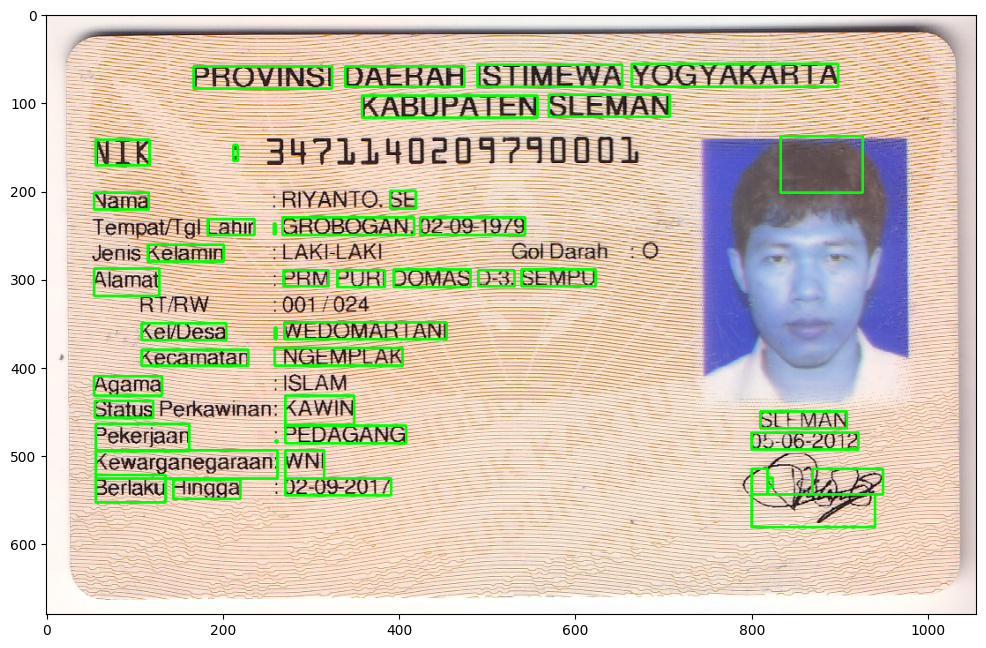

In [34]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
     img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

5.	Hasil pembacaan KTP Menjadi text

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



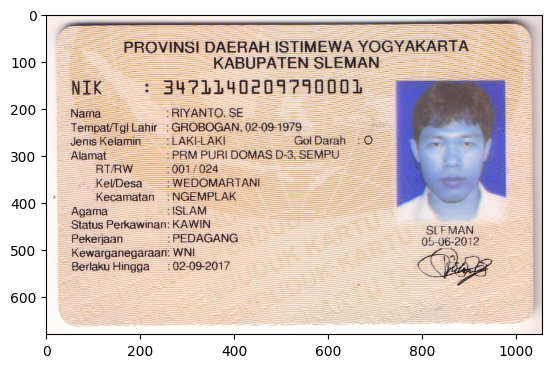

In [33]:
img = cv2.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()


# **Tugas**

Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan  GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



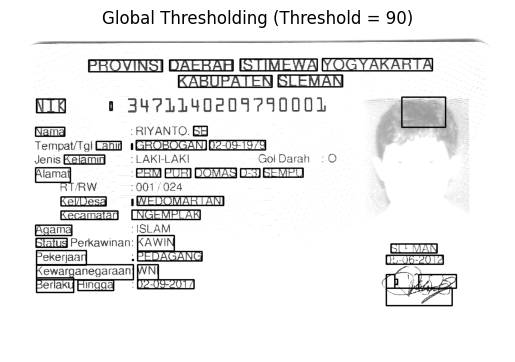

In [42]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

img = cv2.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")

n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
     threshed = cv2.rectangle(threshed, (x, y), (x + w, y + h), (0, 255, 0), 2)

print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

plt.imshow(threshed, cmap='gray')
plt.title('Global Thresholding (Threshold = ' + str(global_thresh_value) + ')')
plt.axis('off')
plt.show()